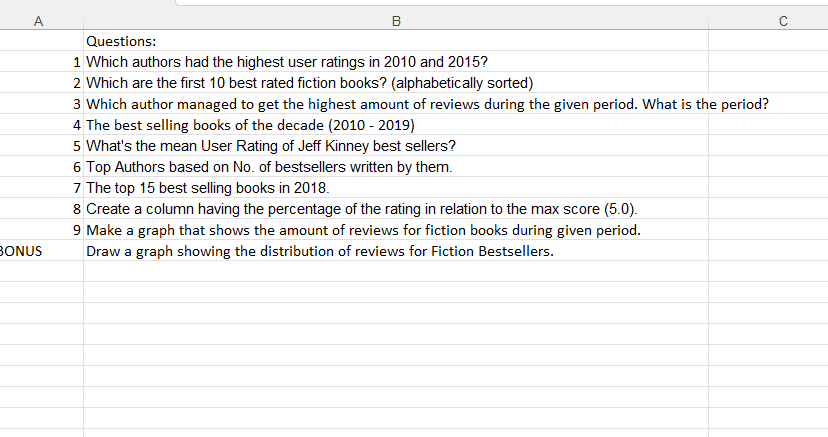

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For display of multiple variables
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


In [56]:
df = pd.read_csv("data.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction
1,Cutting for Stone,Abraham Verghese,4.6,4866,11,2011,Fiction
2,Milk and Vine: Inspirational Quotes From Classic Vines,Adam Gasiewski,4.4,3113,6,2017,Non Fiction
3,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9,2011,Fiction
4,What Should Danny Do? (The Power to Choose Series),Adir Levy,4.8,8170,13,2019,Fiction


In [57]:
# checking for duplicated values
print("Number of duplicated books: ", df[['Name', "Author"]].duplicated().sum())
print("The proportion of duplicated values: ", round(df[['Name', "Author"]].duplicated().mean(), 2))

# dropping duplicates
df.drop_duplicates(subset = ['Name', "Author"], inplace=True)

# checking again
df.duplicated().any()

Number of duplicated books:  199
The proportion of duplicated values:  0.36


False

### Q1. Which authors had the highest user rating in 2010 and 2015?

Top 5 rated author of 2010:

In [38]:
df_2010 = df[df['Year']==2010].sort_values(by = "User Rating", ascending = False)
df_2010[['Author', 'User Rating']].head()

,Author,User Rating
313,Laura Hillenbrand,4.8
411,Rick Riordan,4.8
265,Jeff Kinney,4.8
406,Rick Riordan,4.8
410,Rick Riordan,4.8


Top 5 rated author of 2015:

In [39]:
df_2015 = df[df['Year']==2015].sort_values(by = "User Rating", ascending = False)
df_2015[['Author', 'User Rating']].head()

,Author,User Rating
163,Eric Carle,4.9
455,Sarah Young,4.9
57,Brandon Stanton,4.9
134,Dr. Seuss,4.9
211,Giles Andreae,4.8


### Q2. Which are the first 10 best rated fiction books?

In [40]:
df_fiction = df[df['Genre']=="Fiction"].sort_values(by = "User Rating", ascending = False)
df_fiction10 = df_fiction[["Name", "Author", "User Rating"]].head(10)
df_fiction10.sort_values(by = "Name")

,Name,Author,User Rating
98,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9
99,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9
100,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9
101,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9
102,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9
103,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9
104,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9
133,"Oh, the Places You'll Go!",Dr. Seuss,4.9
167,The Very Hungry Caterpillar,Eric Carle,4.9
164,The Very Hungry Caterpillar,Eric Carle,4.9


### Q3. Which author managed to get the highest amount of reviews during the given period. What is the period?

In [22]:
df_rev = df.groupby("Author").agg(total_reviews = ("Reviews", "sum")).sort_values(by = "total_reviews", ascending = False)

Authors with most reviews:

In [99]:
top_author = df_rev.head(1)
top_author

,total_reviews
Author,
Suzanne Collins,278329


In [48]:
start = df[df['Author'] == 'Suzanne Collins']['Year'].min()
end = df[df['Author'] == 'Suzanne Collins']['Year'].max()

print(f"Dataset contains data about this author from {start} to {end}.")

Dataset contains data about this author from 2010 to 2012.


### Q4. The best selling books of the decade

In [49]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction
1,Cutting for Stone,Abraham Verghese,4.6,4866,11,2011,Fiction
2,Milk and Vine: Inspirational Quotes From Classic Vines,Adam Gasiewski,4.4,3113,6,2017,Non Fiction
3,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9,2011,Fiction
4,What Should Danny Do? (The Power to Choose Series),Adir Levy,4.8,8170,13,2019,Fiction


The dataset does not include any data about book sales, as a result, *we need to define, what makes book a bestseller*?
<br>To start with, in this case the **rating** of the book will be considered as the key factor in definition of best seller. The second important feature will be the **number of reviews** the book has: the rating will be considered to be more reliable if the book contains more reviews. Lastly, it is important to include **price** factor in evaluation, because, it is not likely that a lot of people would by a book if it costs a fortune even if it rated as the best book in the world.

In [61]:
# explorting the price feature
df["Price"].describe()

count    351.000000
mean      13.076923
std       10.050860
min        0.000000
25%        8.000000
50%       12.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

Some books have a the price of 0, which is not likely to be true, as a result, I have decided not to include these into results. I have decided only include prices above first quartile into consideration in order to avoid outliers in prices as it is not the most important factor in my analysis.

In [77]:
df_bs = df[df['Price'] >= 8]

I will consider only top100 best rated book with most reviews:

In [97]:
df_bs_100 = df_bs.sort_values(by = ["User Rating", "Reviews"], ascending = [False, False]).head(100)

In [98]:
df_bs_100.sort_values(by = "Price", ascending = True).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
131,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
267,You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life,Jen Sincero,4.7,14331,8,2016,Non Fiction
278,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
439,Milk and Honey,Rupi Kaur,4.7,17739,8,2016,Non Fiction
503,The Hunger Games (Book 1),Suzanne Collins,4.7,32122,8,2011,Fiction
34,Kitchen Confidential Updated Edition: Adventures in the Culinary Underbelly (P.S.),Anthony Bourdain,4.8,2507,8,2018,Non Fiction
39,The Book with No Pictures,B. J. Novak,4.8,8081,8,2014,Fiction
196,The 5 Love Languages: The Secret to Love that Lasts,Gary Chapman,4.8,25554,8,2015,Non Fiction
99,Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3),Dav Pilkey,4.9,4786,8,2017,Fiction
263,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction


### Q5. Whats the mean User Rating of Jeff Kinney best sellers?

In [82]:
round(df_bs_100[df_bs_100["Author"] == "Jeff Kinney"]["User Rating"].mean(), 2)

4.81

### Q6. Top authors based on No. of best sellers written by them

In [87]:
df_bs_100.groupby("Author").agg(num_bs = ("Name", "count")).sort_values(by = "num_bs", ascending = False).head()

,num_bs
Author,
Jeff Kinney,7
Rick Riordan,6
Suzanne Collins,4
Ree Drummond,3
Dav Pilkey,3


### Q7. The top 15 best selling books in 2018

In [95]:
df_bs_2018 = df_bs[df_bs['Year'] == 2018].sort_values(by = ["User Rating", "Reviews"], ascending = [False, False])

In [106]:
df_bs_2018.sort_values(by = "Price", ascending = True).head(10)[["Name", "Author", "User Rating", "Reviews"]]

,Name,Author,User Rating,Reviews
308,Crazy Rich Asians (Crazy Rich Asians Trilogy),Kevin Kwan,4.3,6143
34,Kitchen Confidential Updated Edition: Adventures in the Culinary Underbelly (P.S.),Anthony Bourdain,4.8,2507
263,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898
29,The Hate U Give,Angie Thomas,4.8,9947
358,Becoming,Michelle Obama,4.8,61133
64,Little Fires Everywhere,Celeste Ng,4.5,25706
518,Whose Boat Is This Boat?: Comments That Don't Help in the Aftermath of a Hurricane,The Staff of The Late Show with¬Ö,4.6,6669
391,"Girl, Wash Your Face: Stop Believing the Lies About Who You Are So You Can Become Who You Were M...",Rachel Hollis,4.6,22288
273,Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book...,Jill Twiss,4.9,11881
299,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979


### Q8.

In [107]:
max_score = 5.0

df['Rating_to_max'] = df["User Rating"] / max_score

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Rating_to_max
0,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction,0.92
2,Milk and Vine: Inspirational Quotes From Classic Vines,Adam Gasiewski,4.4,3113,6,2017,Non Fiction,0.88
3,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9,2011,Fiction,0.96
4,What Should Danny Do? (The Power to Choose Series),Adir Levy,4.8,8170,13,2019,Fiction,0.96
5,Make Your Bed: Little Things That Can Change Your Life...And Maybe the World,Admiral William H. McRaven,4.7,10199,11,2017,Non Fiction,0.94


### Q9.

In [108]:
df["Genre"].unique()

array(['Fiction', 'Non Fiction'], dtype=object)

In [124]:
fb = df[df['Genre'] == "Fiction"][["Year", "Reviews"]]
fb.head()

,Year,Reviews
0,2010,4866
3,2011,9568
4,2019,8170
7,2009,3829
8,2019,27536


In [125]:
fb_grouped = fb.groupby("Year").agg(reviews_per_year = ("Reviews", "sum"))

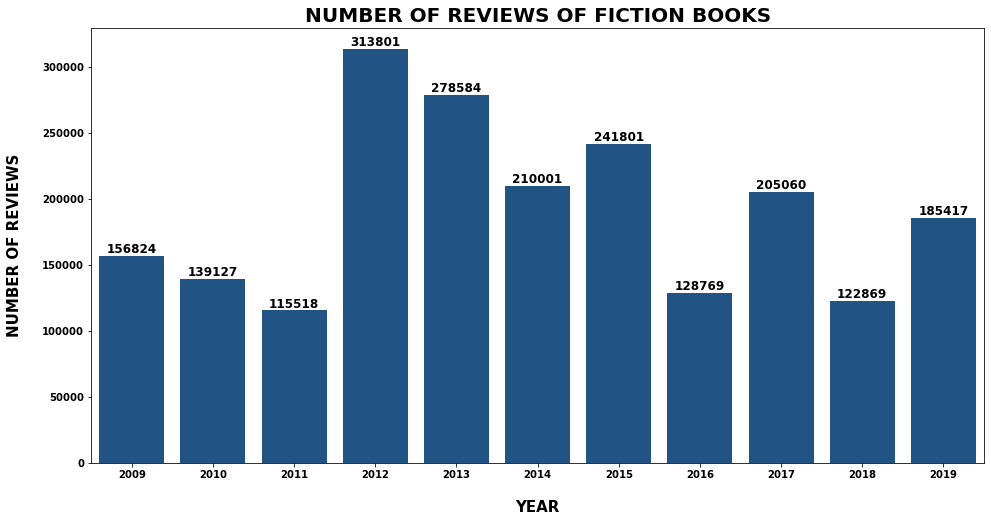

In [127]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=fb_grouped.index, y=fb_grouped["reviews_per_year"], color="#115396")
plt.xlabel("YEAR", size=15, labelpad=20, fontweight="bold")
plt.ylabel("NUMBER OF REVIEWS", size=15, labelpad=20, fontweight="bold")
plt.title("NUMBER OF REVIEWS OF FICTION BOOKS", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")

def bar_values(ax):
    """presenting bar value on top"""
    for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()
        value = f"{int(p.get_height())}"
        ax.text(
            _x,
            _y,
            value,
            verticalalignment="bottom",
            ha="center",
            fontsize=12,
            fontweight="semibold",
        )


bar_values(ax);

### BONUS

Top 100 Fiction books with best rating and highest number of reviews, in this case price will not be included into considerations, because we want just the distribution of reviews.

In [132]:
fb_bs = df_bs[df_bs['Genre'] == "Fiction"].sort_values(by = ["User Rating", "Reviews"], ascending = [False, False]).head(100)
fb_bs

,Name,Author,User Rating,Reviews,Price,Year,Genre
131,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
244,"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",J.K. Rowling,4.9,19622,30,2016,Fiction
102,Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8),Dav Pilkey,4.9,12619,8,2019,Fiction
273,Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book...,Jill Twiss,4.9,11881,13,2018,Fiction
247,"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",J.K. Rowling,4.9,10052,22,2016,Fiction
...,...,...,...,...,...,...,...
252,The President Is Missing: A Novel,James Patterson,4.3,10191,18,2018,Fiction
202,If I Stay,Gayle Forman,4.3,7153,9,2014,Fiction
471,Under the Dome: A Novel,Stephen King,4.3,6740,20,2009,Fiction
308,Crazy Rich Asians (Crazy Rich Asians Trilogy),Kevin Kwan,4.3,6143,8,2018,Fiction


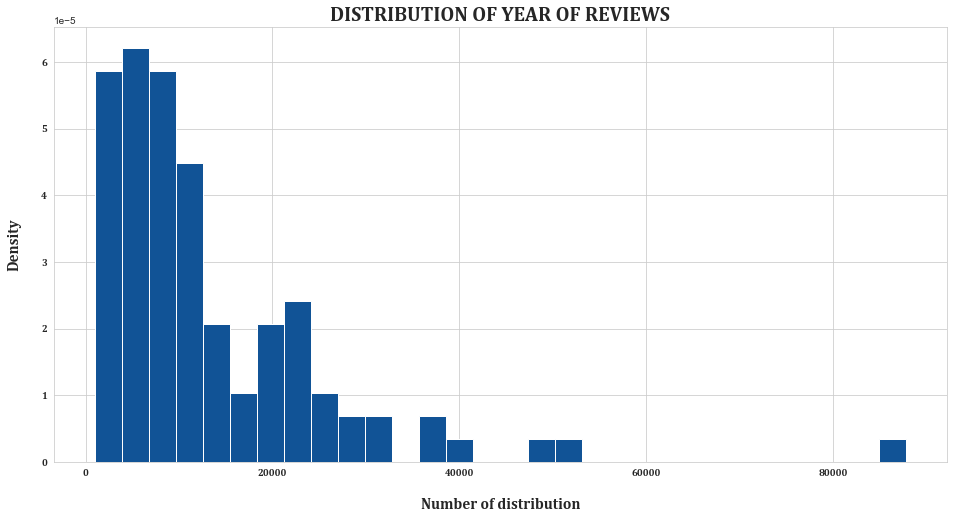

In [140]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.hist(fb_bs["Reviews"], bins=30, density=True, color = "#115396")
plt.xlabel("Number of distribution", size=15, labelpad=20, fontweight="bold", fontname="Cambria")
plt.ylabel("Density", size=15, labelpad=20, fontweight="bold", fontname="Cambria")
plt.title("DISTRIBUTION OF YEAR OF REVIEWS", size=20, weight="bold", fontname="Cambria")
plt.yticks(fontweight="bold", fontname="Cambria")
plt.xticks(fontweight="bold", fontname="Cambria")
sns.set_style("whitegrid");